In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

In [51]:
del df['age']
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['gdp_per_capita ($)']
del df['year']
del df['country']

In [52]:
list = []
for s in df[' gdp_for_year ($) ']:
    list.append(s.replace(',', ''))
df[' gdp_for_year ($) '] = list
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype('int64')

In [53]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(n = 10000, replace = True)

In [54]:
gdp = df.loc[:, ' gdp_for_year ($) ']
suicides = df.loc[:, 'suicides/100k pop']

from sklearn import preprocessing
x = preprocessing.scale(gdp)
x = x.reshape(-1,1)
y = preprocessing.scale(suicides)
y = y.reshape(-1,1)
x_normalized = preprocessing.normalize(x, norm='l2')
y_normalized = preprocessing.normalize(y, norm='l2')
y = y.reshape(-1)
x = x.reshape(-1)

df[' gdp_for_year ($) '] = x
df['suicides/100k pop'] = y

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [38]:
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 19571 to 9343
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suicides/100k pop   5000 non-null   float64
 1    gdp_for_year ($)   5000 non-null   float64
dtypes: float64(2)
memory usage: 117.2 KB


,suicides/100k pop,gdp_for_year ($)
suicides/100k pop,1.000000,0.019052
gdp_for_year ($),0.019052,1.000000


<AxesSubplot:xlabel=' gdp_for_year ($) ', ylabel='suicides/100k pop'>

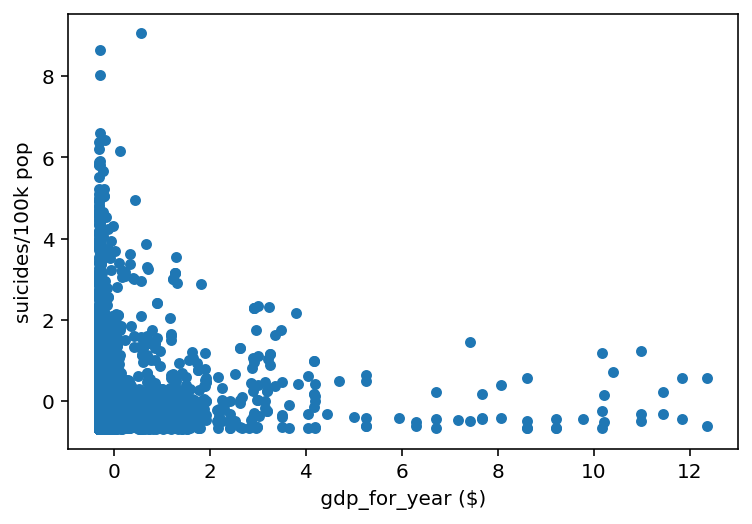

In [39]:
df.plot(kind='scatter',x=' gdp_for_year ($) ',y='suicides/100k pop')

<AxesSubplot:xlabel=' gdp_for_year ($) ', ylabel='suicides/100k pop'>

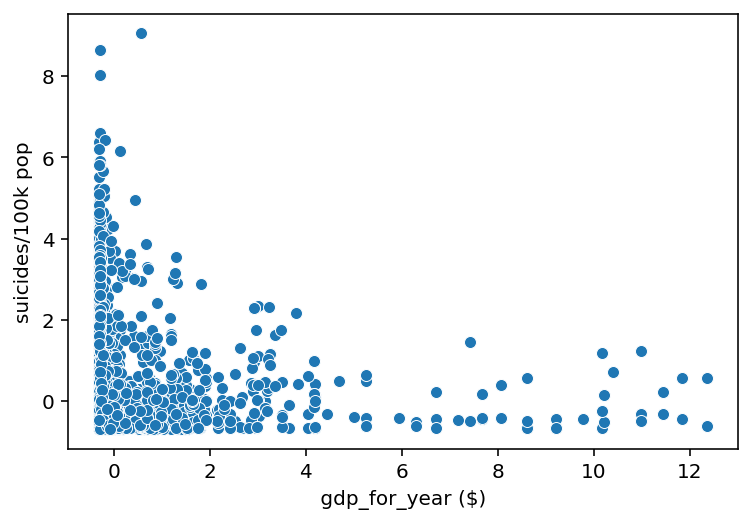

In [40]:
sbn.scatterplot(x = " gdp_for_year ($) ", y = "suicides/100k pop", data=df)

In [41]:
X = df.iloc[:, -1:].values
Y = df.iloc[:, 0].values

print(X)
print(Y)

[[ 0.00808705]
 [-0.30194068]
 [-0.15951179]
 ...
 [-0.24685751]
 [-0.26528429]
 [-0.13058824]]
[-0.41243821 -0.41873718  1.07621771 ...  0.27834853  0.01326699
 -0.19249927]


In [42]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

In [43]:
print(model.coef_)
print(model.intercept_)

[0.01872527]
0.000972397299060282


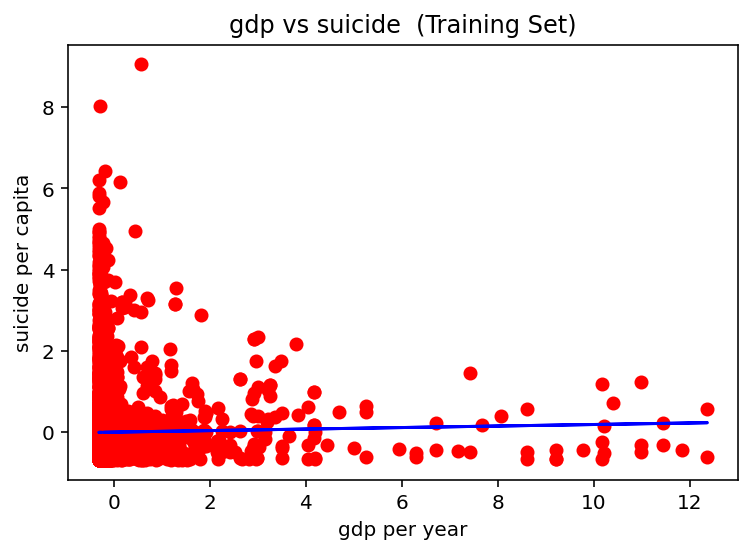

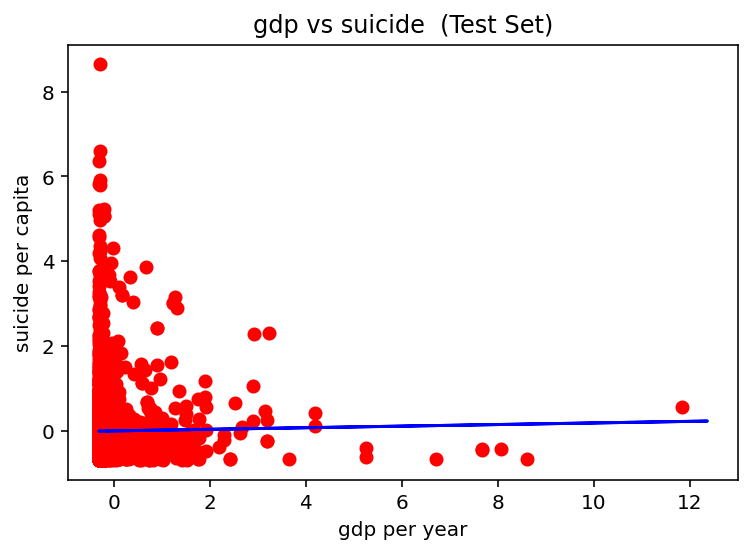

In [44]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Training Set)')
plt.xlabel('gdp per year')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Test Set)')
plt.xlabel('gdp per year')
plt.ylabel('suicide per capita')
plt.show()

In [45]:
model.score(X, Y)

0.00036191424930787086

In [46]:
df.describe()

,suicides/100k pop,gdp_for_year ($)
count,5.000000e+03,5.000000e+03
mean,-1.436073e-16,1.473266e-17
std,1.000100e+00,1.000100e+00
min,-6.811941e-01,-3.135298e-01
25%,-6.313273e-01,-3.069693e-01
50%,-3.667707e-01,-2.801246e-01
75%,1.842577e-01,-1.228473e-01
max,9.049135e+00,1.237211e+01


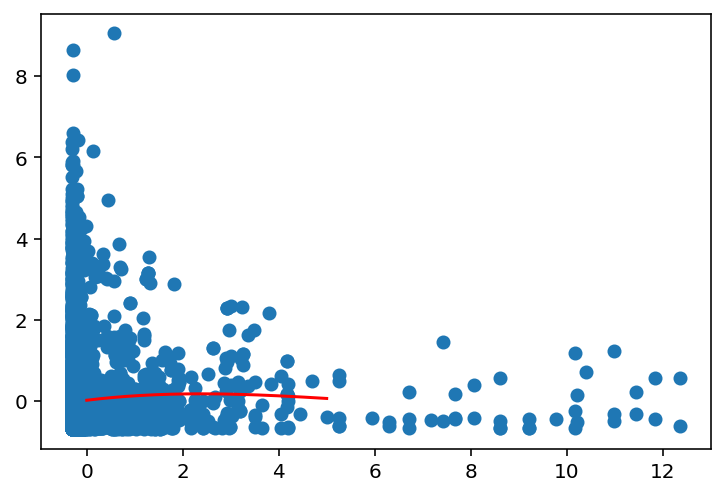

In [47]:
import numpy

x = df[' gdp_for_year ($) ']
y = df['suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.0023166371622531656


In [49]:
mymodel

poly1d([ 0.00222206, -0.03837255,  0.14512488,  0.02240575])